In [34]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## **Counting missing rows with left join**
The Movie Database is supported by volunteers going out into the world, collecting data, and entering it into the database. This includes financial data, such as movie budget and revenue. If you wanted to know which movies are still missing data, you could use a left join to identify them. Practice using a left join by merging the movies table and the financials table.

In [2]:
movies = pd.read_pickle("/content/drive/MyDrive/Data Science & Afins/DATACAMP/01. Data Scientist with Python/04. Joining Data with pandas/datasets/movies.p")
movies.head()

,id,title,popularity,release_date
0,257,Oliver Twist,20.415572,2005-09-23
1,14290,Better Luck Tomorrow,3.877036,2002-01-12
2,38365,Grown Ups,38.864027,2010-06-24
3,9672,Infamous,3.680896,2006-11-16
4,12819,Alpha and Omega,12.300789,2010-09-17


In [3]:
financials = pd.read_pickle("/content/drive/MyDrive/Data Science & Afins/DATACAMP/01. Data Scientist with Python/04. Joining Data with pandas/datasets/financials.p")
financials.head()

,id,budget,revenue
0,19995,237000000,2.787965e+09
1,285,300000000,9.610000e+08
2,206647,245000000,8.806746e+08
3,49026,250000000,1.084939e+09
4,49529,260000000,2.841391e+08


In [6]:
# Merge movies and financials with a left join
movies_financials = movies.merge(financials, on = 'id', how = 'left')

# Count the number of rows in the budget column that are missing
number_of_missing_fin = movies_financials['budget'].isnull().sum()

# Print the number of movies missing financials
print(number_of_missing_fin)

1574


## **Enriching a dataset**
Setting how='left' with the .merge() method is a useful technique for enriching or enhancing a dataset with additional information from a different table. In this exercise, you will start off with a sample of movie data from the movie series Toy Story. Your goal is to enrich this data by adding the marketing tag line for each movie. You will compare the results of a left join versus an inner join.

In [11]:
toy_story = movies[movies['title'].str.contains("Toy Story")].reset_index(drop=True)

In [12]:
taglines = pd.read_pickle("/content/drive/MyDrive/Data Science & Afins/DATACAMP/01. Data Scientist with Python/04. Joining Data with pandas/datasets/taglines.p")
taglines.head()

,id,tagline
0,19995,Enter the World of Pandora.
1,285,"At the end of the world, the adventure begins."
2,206647,A Plan No One Escapes
3,49026,The Legend Ends
4,49529,"Lost in our world, found in another."


In [13]:
# Merge the toy_story and taglines tables with a left join
toystory_tag = toy_story.merge(taglines, on ='id', how ='left')

# Print the rows and shape of toystory_tag
print(toystory_tag)
print(toystory_tag.shape)

      id        title  popularity release_date                   tagline
0  10193  Toy Story 3   59.995418   2010-06-16  No toy gets left behind.
1    863  Toy Story 2   73.575118   1999-10-30        The toys are back!
2    862    Toy Story   73.640445   1995-10-30                       NaN
(3, 5)


In [14]:
# Merge the toy_story and taglines tables with a inner join
toystory_tag = toy_story.merge(taglines, on ='id', how ='inner')

# Print the rows and shape of toystory_tag
print(toystory_tag)
print(toystory_tag.shape)

      id        title  popularity release_date                   tagline
0  10193  Toy Story 3   59.995418   2010-06-16  No toy gets left behind.
1    863  Toy Story 2   73.575118   1999-10-30        The toys are back!
(2, 5)


## **Right join to find unique movies**
Most of the recent big-budget science fiction movies can also be classified as action movies. You are given a table of science fiction movies called scifi_movies and another table of action movies called action_movies. Your goal is to find which movies are considered only science fiction movies. Once you have this table, you can merge the movies table in to see the movie names. 

In [17]:
movie_to_genres = pd.read_pickle("/content/drive/MyDrive/Data Science & Afins/DATACAMP/01. Data Scientist with Python/04. Joining Data with pandas/datasets/movie_to_genres.p")
action_movies = movie_to_genres[movie_to_genres['genre']=='Action']
scifi_movies = movie_to_genres[movie_to_genres['genre']=='Science Fiction']

In [20]:
# Merge action_movies to scifi_movies with right join
action_scifi = action_movies.merge(scifi_movies, on ='movie_id', how ='right')

In [21]:
# Merge action_movies to scifi_movies with right join
action_scifi = action_movies.merge(scifi_movies, on='movie_id', how='right',
                                   suffixes=("_act", "_sci"))

# Print the first few rows of action_scifi to see the structure
print(action_scifi.head())

   movie_id genre_act        genre_sci
0        11    Action  Science Fiction
1        18    Action  Science Fiction
2        19       NaN  Science Fiction
3        38       NaN  Science Fiction
4        62       NaN  Science Fiction


In [23]:
# From action_scifi, select only the rows where the genre_act column is null
scifi_only = action_scifi[action_scifi["genre_act"].isnull()]

In [24]:
# Merge the movies and scifi_only tables with an inner join
movies_and_scifi_only = movies.merge(scifi_only, left_on = "id", right_on = 'movie_id')

# Print the first few rows and shape of movies_and_scifi_only
print(movies_and_scifi_only.head())
print(movies_and_scifi_only.shape)

      id                         title  popularity release_date  movie_id  \
0  18841  The Lost Skeleton of Cadavra    1.680525   2001-09-12     18841   
1  26672     The Thief and the Cobbler    2.439184   1993-09-23     26672   
2  15301      Twilight Zone: The Movie   12.902975   1983-06-24     15301   
3   8452                   The 6th Day   18.447479   2000-11-17      8452   
4   1649    Bill & Ted's Bogus Journey   11.349664   1991-07-19      1649   

  genre_act        genre_sci  
0       NaN  Science Fiction  
1       NaN  Science Fiction  
2       NaN  Science Fiction  
3       NaN  Science Fiction  
4       NaN  Science Fiction  
(258, 7)


## **Popular genres with right join**
What are the genres of the most popular movies? To answer this question, you need to merge data from the movies and movie_to_genres tables. In a table called pop_movies, the top 10 most popular movies in the movies table have been selected. To ensure that you are analyzing all of the popular movies, merge it with the movie_to_genres table using a right join. To complete your analysis, count the number of different genres. Also, the two tables can be merged by the movie ID. However, in pop_movies that column is called id, and in movies_to_genres it's called movie_id.

In [29]:
pop_movies = movies.sort_values(by='popularity', ascending=False).head(10)

In [32]:
movie_to_genres.columns

Index(['movie_id', 'genre'], dtype='object')

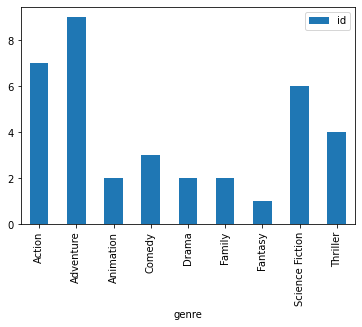

In [35]:
# Use right join to merge the movie_to_genres and pop_movies tables
genres_movies = movie_to_genres.merge(pop_movies, how='right', 
                                      left_on='movie_id', 
                                      right_on='id')

# Count the number of genres
genre_count = genres_movies.groupby('genre').agg({'id':'count'})

# Plot a bar chart of the genre_count
genre_count.plot(kind='bar')
plt.show()

In [36]:
movies

,id,title,popularity,release_date
0,257,Oliver Twist,20.415572,2005-09-23
1,14290,Better Luck Tomorrow,3.877036,2002-01-12
2,38365,Grown Ups,38.864027,2010-06-24
3,9672,Infamous,3.680896,2006-11-16
4,12819,Alpha and Omega,12.300789,2010-09-17
...,...,...,...,...
4798,3089,Red River,5.344815,1948-08-26
4799,11934,The Hudsucker Proxy,14.188982,1994-03-11
4800,13807,Exiled,8.486390,2006-09-06
4801,73873,Albert Nobbs,7.802245,2011-12-21


In [37]:
actors_movies = pd.read_csv("/content/drive/MyDrive/Data Science & Afins/DATACAMP/01. Data Scientist with Python/04. Joining Data with pandas/datasets/actors_movies.csv")
actors_movies.head()

,Actor,Title
0,"[Emil Eifrem,Hugo Weaving,Laurence Fishburne,C...",The Matrix
1,"[Hugo Weaving,Laurence Fishburne,Carrie-Anne M...",The Matrix Reloaded
2,"[Hugo Weaving,Laurence Fishburne,Carrie-Anne M...",The Matrix Revolutions
3,"[Al Pacino,Charlize Theron,Keanu Reeves]",The Devil's Advocate
4,"[James Marshall,Kevin Pollak,J.T. Walsh,Aaron ...",A Few Good Men


## **Using outer join to select actors**
One cool aspect of using an outer join is that, because it returns all rows from both merged tables and null where they do not match, you can use it to find rows that do not have a match in the other table. To try for yourself, you have been given two tables with a list of actors from two popular movies: Iron Man 1 and Iron Man 2. Most of the actors played in both movies. Use an outer join to find actors who did not act in both movies.


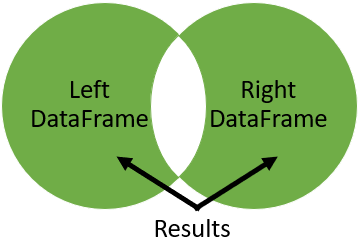

In [38]:
casts = pd.read_pickle("/content/drive/MyDrive/Data Science & Afins/DATACAMP/01. Data Scientist with Python/04. Joining Data with pandas/datasets/casts.p")
casts.head()

,movie_id,cast_id,character,gender,id,name
7,5,22,Jezebel,1,3122,Sammi Davis
8,5,23,Diana,1,3123,Amanda de Cadenet
9,5,24,Athena,1,3124,Valeria Golino
3,5,25,Elspeth,1,3125,Madonna
12,5,26,Eva,1,3126,Ione Skye


In [60]:
iron_1_actors = casts[(casts['movie_id']==1726)&((casts['cast_id']==9)|(casts['cast_id']==10))][["character","id","name"]]
iron_2_actors = casts[(casts['movie_id']==10138)&((casts['cast_id']==3)|(casts['cast_id']==5))][["character","id","name"]]

In [61]:
# Merge iron_1_actors to iron_2_actors on id with outer join using suffixes
iron_1_and_2 = iron_1_actors.merge(iron_2_actors,
                                     on='id',
                                     how = 'outer',
                                     suffixes=["_1", "_2"])

# Create an index that returns true if name_1 or name_2 are null
m = ((iron_1_and_2['name_1'].isnull()) | 
     (iron_1_and_2['name_2'].isnull()))

# Print the first few rows of iron_1_and_2
print(iron_1_and_2[m].head())

               character_1     id           name_1  \
0                   Yinsen  17857       Shaun Toub   
1  Virginia "Pepper" Potts  12052  Gwyneth Paltrow   
2                      NaN   2295              NaN   
3                      NaN   1245              NaN   

                                        character_2              name_2  
0                                               NaN                 NaN  
1                                               NaN                 NaN  
2                             Ivan Vanko / Whiplash       Mickey Rourke  
3  Natalie Rushman / Natasha Romanoff / Black Widow  Scarlett Johansson  


## **Self join**
Merging a table to itself can be useful when you want to compare values in a column to other values in the same column. In this exercise, you will practice this by creating a table that for each movie will list the movie director and a member of the crew on one row. You have been given a table called crews, which has columns id, job, and name. First, merge the table to itself using the movie ID. This merge will give you a larger table where for each movie, every job is matched against each other. Then select only those rows with a director in the left table, and avoid having a row where the director's job is listed in both the left and right tables. This filtering will remove job combinations that aren't with the director.

In [62]:
crews = pd.read_pickle("/content/drive/MyDrive/Data Science & Afins/DATACAMP/01. Data Scientist with Python/04. Joining Data with pandas/datasets/crews.p")
crews.head()

,id,department,job,name
0,19995,Editing,Editor,Stephen E. Rivkin
2,19995,Sound,Sound Designer,Christopher Boyes
4,19995,Production,Casting,Mali Finn
6,19995,Directing,Director,James Cameron
7,19995,Writing,Writer,James Cameron


In [65]:
# Merge the crews table to itself
crews_self_merged = crews.merge(crews, on ='id', how ='inner', suffixes = ["_dir", "_crew"])


# Create a Boolean index to select the appropriate

"""
Create a Boolean index, named boolean_filter, that selects rows from the left table with the job of
'Director' and avoids rows with the job of 'Director' in the right table.
"""
boolean_filter = ((crews_self_merged['job_dir'] == 'Director') & 
     (crews_self_merged['job_crew'] != "Director"))
direct_crews = crews_self_merged[boolean_filter]

# Print the first few rows of direct_crews
print(direct_crews.head())

        id department_dir   job_dir       name_dir department_crew  \
156  19995      Directing  Director  James Cameron         Editing   
157  19995      Directing  Director  James Cameron           Sound   
158  19995      Directing  Director  James Cameron      Production   
160  19995      Directing  Director  James Cameron         Writing   
161  19995      Directing  Director  James Cameron             Art   

           job_crew          name_crew  
156          Editor  Stephen E. Rivkin  
157  Sound Designer  Christopher Boyes  
158         Casting          Mali Finn  
160          Writer      James Cameron  
161    Set Designer    Richard F. Mays  


## **Index merge for movie ratings**
To practice merging on indexes, you will merge movies and a table called ratings that holds info about movie ratings. Make sure your merge returns all of the rows from the movies table and not all the rows of ratings table need to be included in the result.

In [66]:
ratings = pd.read_pickle("/content/drive/MyDrive/Data Science & Afins/DATACAMP/01. Data Scientist with Python/04. Joining Data with pandas/datasets/ratings.p")
ratings.head()

,id,vote_average,vote_count
0,19995,7.2,11800.0
1,285,6.9,4500.0
2,206647,6.3,4466.0
3,49026,7.6,9106.0
4,49529,6.1,2124.0


In [67]:
ratings.set_index('id',inplace=True)
movies.set_index('id',inplace=True)

In [70]:
# Merge to the movies table the ratings table on the index
movies_ratings = movies.merge(ratings, on = 'id', how = 'left')

# Print the first few rows of movies_ratings
print(movies_ratings.head())

                      title  popularity release_date  vote_average  vote_count
id                                                                            
257            Oliver Twist   20.415572   2005-09-23           6.7       274.0
14290  Better Luck Tomorrow    3.877036   2002-01-12           6.5        27.0
38365             Grown Ups   38.864027   2010-06-24           6.0      1705.0
9672               Infamous    3.680896   2006-11-16           6.4        60.0
12819       Alpha and Omega   12.300789   2010-09-17           5.3       124.0


## **Do sequels earn more?**
It is time to put together many of the aspects that you have learned in this chapter. In this exercise, you'll find out which movie sequels earned the most compared to the original movie. To answer this question, you will merge a modified version of the sequels and financials tables where their index is the movie ID. You will need to choose a merge type that will return all of the rows from the sequels table and not all the rows of financials table need to be included in the result. From there, you will join the resulting table to itself so that you can compare the revenue values of the original movie to the sequel. Next, you will calculate the difference between the two revenues and sort the resulting dataset.

In [72]:
sequels = pd.read_pickle("/content/drive/MyDrive/Data Science & Afins/DATACAMP/01. Data Scientist with Python/04. Joining Data with pandas/datasets/sequels.p")
financials = pd.read_pickle("/content/drive/MyDrive/Data Science & Afins/DATACAMP/01. Data Scientist with Python/04. Joining Data with pandas/datasets/financials.p")

In [76]:
sequels.set_index('id',inplace=True)
financials.set_index('id',inplace=True)

In [84]:
# Merge sequels and financials on index id
sequels_fin = sequels.merge(financials, on ='id', how ='left')

sequels_fin = sequels_fin[sequels_fin['sequel']!='<NA>']

# Self merge with suffixes as inner join with left on sequel and right on id
orig_seq = sequels_fin.merge(sequels_fin, how='inner', left_on='sequel', 
                             right_on='id', right_index=True,
                             suffixes=['_org','_seq'])

# Add calculation to subtract revenue_org from revenue_seq 
orig_seq['diff'] = orig_seq['revenue_seq'] - orig_seq['revenue_org']

# Select the title_org, title_seq, and diff 
titles_diff = orig_seq[['title_org','title_seq','diff']]

# Print the first rows of the sorted titles_diff
print(titles_diff.sort_values(by = 'diff', ascending=False).head())

                                         title_org  \
id                                                   
1771            Captain America: The First Avenger   
816    Austin Powers: International Man of Mystery   
87            Indiana Jones and the Temple of Doom   
862                                      Toy Story   
36657                                        X-Men   

                                   title_seq         diff  
id                                                         
1771     Captain America: The Winter Soldier  344196798.0  
816    Austin Powers: The Spy Who Shagged Me  243256097.0  
87        Indiana Jones and the Last Crusade  141171806.0  
862                              Toy Story 2  123812836.0  
36657                                     X2  111372022.0  
